![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Limpieza de datos para crear gráficos descriptivos y modelo de ML

Nos dan un dataset con información relativa da distintas películas y el número de likes que han recibido en Facebook y Twitter. Nos piden:

1. Preparar el dataset para crear un modelo de ML que nos permita predecir el número de likes a partir de las características de las películas.
2. Además del modelo, necesitaremos presentar algunos gráficos a nuestros stakeholders. Es necesario que la data este preparada para ello.
3. Identificar problemas graves en la data y comunicarlos lo antes posible.
4. Adicionalmente, nuestro stakeholder tiene "curiosidad" por algunas cifras:
    - Actores más repetidos en el dataset
    - Géneros de películas más comunes
    - Relación entre presupuesto y recaudación


## Leer datos

In [197]:
import pandas as pd
import numpy as np

df_imdb = pd.read_csv('data/imdb_clase.csv', sep=";", index_col=0).reset_index(drop=True)

In [198]:
df_imdb.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
0,Color,Martin Scorsese,240,"$116,866,727.00",Biography|Comedy|Crime|Drama,the wolf of wall street,2013,English,USA,"USD 100,000,000.00",8.20,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,1000
1,Color,Shane Black,195,"$408,992,272.00",Action|Adventure|Sci-Fi,iron man 3,2013,English,USA,"USD 200,000,000.00",7.20,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,1000
2,color,Quentin Tarantino,187,"$54,116,191.00",Crime|Drama|Mystery|Thriller|Western,the hateful eight,2015,English,USA,"USD 44,000,000.00",7.90,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,1000
3,Color,Kenneth Lonergan,186,"$46,495.00",Drama,margaret,2011,English,usa,"USD 14,000,000.00",6.50,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0,1000
4,Color,Peter Jackson,186,"$258,355,354.00",Adventure|Fantasy,the hobbit: the desolation of smaug,2013,English,USA,"USD 225,000,000.00",7.90,"Aidan Turner,Adam Brown,James Nesbitt",83000,1000


## Limpieza de datos

### Revisiones generales: `.columns`, `.index`, `.shape`

In [199]:
df_imdb.columns

Index(['color', 'director_name', 'duration', 'gross', 'genres', 'movie_title',
       'title_year', 'language', 'country', 'budget', 'imdb_score', 'actors',
       'movie_facebook_likes', 'movie_twitter_likes'],
      dtype='object')

In [200]:
df_imdb.index

RangeIndex(start=0, stop=99, step=1)

In [201]:
df_imdb.shape

(99, 14)

### Ver algunas observaciones: `.head()`, `.tail()`, `.sample()`

In [202]:
df_imdb.head(3)

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
0,Color,Martin Scorsese,240,"$116,866,727.00",Biography|Comedy|Crime|Drama,the wolf of wall street,2013,English,USA,"USD 100,000,000.00",8.20,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,1000
1,Color,Shane Black,195,"$408,992,272.00",Action|Adventure|Sci-Fi,iron man 3,2013,English,USA,"USD 200,000,000.00",7.20,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,1000
2,color,Quentin Tarantino,187,"$54,116,191.00",Crime|Drama|Mystery|Thriller|Western,the hateful eight,2015,English,USA,"USD 44,000,000.00",7.90,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,1000


In [203]:
df_imdb.tail(1)

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
98,Color,Clint Eastwood,5,"$47,034,272.00",Biography|Drama|Music|Musical,jersey boys,2014,English,USA,"USD 40,000,000.00",6.90,"Johnny Cannizzaro,Steve Schirripa,Scott Vance",16000,1000


In [204]:
df_imdb.sample(3)

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
31,Color,Ridley Scott,150,"$65,007,045.00",Action|Adventure|Drama,exodus: gods and kings,2014,English,UK,"USD 140,000,000.00",6.10,"Christian Bale,María Valverde,Ben Mendelsohn",51000,1000
80,NaN,James Mangold,138,"$132,550,960.00",Action|Adventure|Sci-Fi|Thriller,the wolverine,2013,English,USA,"USD 120,000,000.00",6.70,"Hugh Jackman,Tao Okamoto,Rila Fukushima",68000,1000
36,Color,Bryan Singer,149,"$233,914,986.00",Action|Adventure|Fantasy|Sci-Fi|Thriller,x-men: days of future past,2014,English,United States,"USD 200,000,000.00",8.00,"Jennifer Lawrence,Peter Dinklage,Hugh Jackman",82000,1000


### Describir dataset: `info()`, `describe()`

In [205]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 88 non-null     object 
 1   director_name         88 non-null     object 
 2   duration              99 non-null     int64  
 3   gross                 99 non-null     object 
 4   genres                98 non-null     object 
 5   movie_title           99 non-null     object 
 6   title_year            99 non-null     int64  
 7   language              99 non-null     object 
 8   country               99 non-null     object 
 9   budget                99 non-null     object 
 10  imdb_score            99 non-null     float64
 11  actors                99 non-null     object 
 12  movie_facebook_likes  99 non-null     int64  
 13  movie_twitter_likes   99 non-null     int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 11.0+ KB


In [206]:
df_imdb.describe()

,duration,title_year,imdb_score,movie_facebook_likes,movie_twitter_likes
count,99.00,99.00,99.00,99.00,99.00
mean,155.49,1944.01,6.89,66045.71,1000.00
std,72.80,393.85,1.93,58108.86,0.00
min,-50.00,-1000.00,-7.50,0.00,1000.00
25%,138.50,2012.00,6.55,25000.00,1000.00
50%,143.00,2013.00,7.20,54000.00,1000.00
75%,155.00,2014.00,7.85,85500.00,1000.00
max,650.00,2030.00,8.80,349000.00,1000.00


In [207]:
df_imdb.describe(include="all")

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
count,88,88,99.00,99,98,99,99.00,99,99,99,99.00,99,99.00,99.00
unique,3,63,NaN,87,56,91,NaN,1,12,57,NaN,88,NaN,NaN
top,Color,Ridley Scott,NaN,$nan,Action|Adventure|Sci-Fi,ben-hur,NaN,English,USA,"USD 100,000,000.00",NaN,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",NaN,NaN
freq,86,4,NaN,7,10,3,NaN,99,77,6,NaN,3,NaN,NaN
mean,NaN,NaN,155.49,NaN,NaN,NaN,1944.01,NaN,NaN,NaN,6.89,NaN,66045.71,1000.00
std,NaN,NaN,72.80,NaN,NaN,NaN,393.85,NaN,NaN,NaN,1.93,NaN,58108.86,0.00
min,NaN,NaN,-50.00,NaN,NaN,NaN,-1000.00,NaN,NaN,NaN,-7.50,NaN,0.00,1000.00
25%,NaN,NaN,138.50,NaN,NaN,NaN,2012.00,NaN,NaN,NaN,6.55,NaN,25000.00,1000.00
50%,NaN,NaN,143.00,NaN,NaN,NaN,2013.00,NaN,NaN,NaN,7.20,NaN,54000.00,1000.00
75%,NaN,NaN,155.00,NaN,NaN,NaN,2014.00,NaN,NaN,NaN,7.85,NaN,85500.00,1000.00


### Valores faltantes: `.isnull()`, `.isna()`

In [208]:
df_imdb.isnull().any()

color                    True
director_name            True
duration                False
gross                   False
genres                   True
movie_title             False
title_year              False
language                False
country                 False
budget                  False
imdb_score              False
actors                  False
movie_facebook_likes    False
movie_twitter_likes     False
dtype: bool

In [209]:
df_imdb.isna().sum()

color                   11
director_name           11
duration                 0
gross                    0
genres                   1
movie_title              0
title_year               0
language                 0
country                  0
budget                   0
imdb_score               0
actors                   0
movie_facebook_likes     0
movie_twitter_likes      0
dtype: int64

In [210]:
df_imdb.isnull().mean() * 100

color                  11.11
director_name          11.11
duration                0.00
gross                   0.00
genres                  1.01
movie_title             0.00
title_year              0.00
language                0.00
country                 0.00
budget                  0.00
imdb_score              0.00
actors                  0.00
movie_facebook_likes    0.00
movie_twitter_likes     0.00
dtype: float64

### Quitar filas duplicadas: `.duplicated()`. `.drop_duplicates()`

In [211]:
df_imdb[df_imdb.duplicated()].T

,9,31,53,55,63
color,Color,Color,Color,Color,Color
director_name,Joss Whedon,Ridley Scott,Sam Mendes,Baz Luhrmann,Timur Bekmambetov
duration,173,150,143,143,141
gross,"$623,279,547.00","$65,007,045.00","$304,360,277.00","$144,812,796.00",$nan
genres,Action|Adventure|Sci-Fi,Action|Adventure|Drama,Action|Adventure|Thriller,Drama|Romance,Adventure|Drama|History
movie_title,the avengers,exodus: gods and kings,skyfall,the great gatsby,ben-hur
title_year,2012,2014,2012,2013,2016
language,English,English,English,English,English
country,USA,UK,UK,Australia,USA
budget,"USD 220,000,000.00","USD 140,000,000.00","USD 200,000,000.00","USD 105,000,000.00","USD 100,000,000.00"


In [212]:
df_imdb.shape, df_imdb.drop_duplicates().shape

((99, 14), (94, 14))

In [213]:
df_imdb = df_imdb.drop_duplicates()

In [214]:
df_imdb.shape

(94, 14)

## Tratamiento de columnas

Dylan:

- `color`
- `director_name`
- `gross`
- `duration`

Todos:
- `movie_title`
- `title_year`
- `movie_twitter_likes`
- `imdb_score`
- `country`
- `language`
- `actors`
- `movie_facebook_likes`


### Columna `color`

In [215]:
df_imdb.color.value_counts(dropna=False)

Color               81
NaN                 11
color                1
 Black and White     1
Name: color, dtype: int64

In [216]:
df_imdb[df_imdb.color.isnull()].T

,5,10,15,18,56,65,74,76,80,83,87
color,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director_name,NaN,Tom Tykwer,Richard Linklater,Christopher Nolan,NaN,Oliver Stone,Terrence Malick,Robert Zemeckis,James Mangold,Walter Salles,Seth MacFarlane
duration,183,172,165,164,143,141,139,138,138,137,136
gross,"$330,249,062.00","$27,098,580.00","$25,359,200.00","$448,130,642.00",$nan,"$47,307,550.00","$13,303,319.00","$93,749,203.00","$132,550,960.00","$717,753.00","$42,615,685.00"
genres,Action|Adventure|Sci-Fi,Drama|Sci-Fi,Drama,Action|Thriller,Drama|Horror|Thriller,Crime|Drama|Thriller,Drama|Fantasy,Drama|Thriller,Action|Adventure|Sci-Fi|Thriller,Adventure|Drama,Comedy|Western
movie_title,batman v superman: dawn of justice,cloud atlas,boyhood,the dark knight rises,the ridges,savages,the tree of life,flight,the wolverine,on the road,a million ways to die in the west
title_year,202,2012,2014,2012,2011,2012,2011,2012,2013,2012,2014
language,English,English,English,English,English,English,English,English,English,English,English
country,USA,Germany,USA,USA,USA,USA,USA,USA,USA,France,USA
budget,"USD 250,000,000.00","USD 102,000,000.00","USD 4,000,000.00","USD 250,000,000.00","USD 17,350.00","USD 45,000,000.00","USD 32,000,000.00","USD 31,000,000.00","USD 120,000,000.00","USD 25,000,000.00","USD 40,000,000.00"


In [217]:
df_imdb.loc[df_imdb.color.isnull(), "color"] = "Color"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [218]:
df_imdb.color.value_counts(dropna=False)

Color               92
color                1
 Black and White     1
Name: color, dtype: int64

In [219]:
df_imdb.color.str.capitalize().value_counts()

Color               92
Color                1
 black and white     1
Name: color, dtype: int64

In [220]:
df_imdb.color.str.strip().str.capitalize().value_counts()

Color              93
Black and white     1
Name: color, dtype: int64

In [221]:
df_imdb["color"] = df_imdb.color.str.strip().str.capitalize()

In [222]:
df_imdb.color.unique()

array(['Color', 'Black and white'], dtype=object)

In [223]:
assert df_imdb.color.isna().any() == False
assert sorted(df_imdb.color.unique()) == ["Black and white", "Color"]

### Columna `director_name`

In [224]:
df_imdb.director_name.value_counts(dropna=False)

NaN                  11
Michael Bay           3
Peter Jackson         3
Christopher Nolan     3
Ridley Scott          3
                     ..
Adam McKay            1
Zack Snyder           1
Baz Luhrmann          1
Kenneth Lonergan      1
Clint Eastwood        1
Name: director_name, Length: 64, dtype: int64

In [225]:
df_imdb[df_imdb.director_name.isnull()].T

,5,24,32,41,56,59,71,75,82,84,91
color,Color,Color,Color,Color,Color,Color,Color,Color,Color,Color,Color
director_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,183,156,150,147,143,142,139,138,137,137,136
gross,"$330,249,062.00","$183,635,922.00","$182,204,440.00","$407,197,282.00",$nan,"$407,999,255.00","$150,832,203.00","$150,117,807.00","$37,304,950.00","$281,666,058.00","$52,474,616.00"
genres,Action|Adventure|Sci-Fi,Adventure|Drama|Thriller|Western,Biography|Drama|History|War,Action|Adventure|Sci-Fi,Drama|Horror|Thriller,Adventure|Drama|Sci-Fi|Thriller,Adventure|Mystery|Sci-Fi,Crime|Drama,Biography|Crime|Drama,Adventure|Sci-Fi,Drama
movie_title,batman v superman: dawn of justice,the revenant,lincoln,captain america: civil war,the ridges,the hunger games,divergent,american hustle,j. edgar,the hunger games: mockingjay - part 2,wall street: money never sleeps
title_year,202,2015,2012,2016,2011,2012,1800,2013,2011,2015,2010
language,English,English,English,English,English,English,English,English,English,English,English
country,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
budget,"USD 250,000,000.00","USD 135,000,000.00","USD 65,000,000.00","USD 250,000,000.00","USD 17,350.00","USD 78,000,000.00","USD 85,000,000.00","USD 40,000,000.00","USD 35,000,000.00","USD 160,000,000.00","USD 70,000,000.00"


In [226]:
df_imdb.loc[df_imdb.director_name.isnull(), "director_name"] = "No information available"

In [227]:
df_imdb.director_name.value_counts(dropna=False)

No information available    11
Michael Bay                  3
Peter Jackson                3
Christopher Nolan            3
Ridley Scott                 3
                            ..
Adam McKay                   1
Zack Snyder                  1
Baz Luhrmann                 1
Kenneth Lonergan             1
Clint Eastwood               1
Name: director_name, Length: 64, dtype: int64

In [228]:
pd.set_option("display.max_rows", None)
df_imdb.director_name.value_counts(dropna=False)
pd.reset_option("display.max_rows")

In [229]:
df_imdb[df_imdb.director_name.str.len() < 5]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes
11,Color,Null,158,"$102,515,793.00",Crime|Drama|Mystery|Thriller,the girl with the dragon tattoo,2011,English,USA,"USD 90,000,000.00",7.80,"Robin Wright,Goran Visnjic,Joely Richardson",54000,1000
29,Color,Nan,151,"$228,430,993.00",Adventure|Drama|Sci-Fi,the martian,2015,English,USA,"USD 108,000,000.00",8.10,"Matt Damon,Donald Glover,Benedict Wong",153000,1000


In [230]:
# Opción 1
# df_imdb.loc[
#     df_imdb.director_name.str.lower().str.strip().isin(["null", "nan"]), 
#     "director_name"
# ] = "No information available"

In [231]:
# Opción 2
df_imdb.loc[
    df_imdb.director_name.str.lower().str.strip().str.match("(null|nan)"), 
    "director_name"
] = "No information available"

In [232]:
# Opción 3
# filter_nulls = (
#     (df_imdb.director_name.str.lower().str.strip() == "null") 
#     | (df_imdb.director_name.str.lower().str.strip() == "nan")
# ) 
# df_imdb.loc[filter_nulls, "director_name"] = "No information available"

In [233]:
df_imdb.director_name.value_counts(dropna=False)

No information available    13
Peter Jackson                3
Christopher Nolan            3
Ridley Scott                 3
Michael Bay                  3
                            ..
Adam McKay                   1
Zack Snyder                  1
Baz Luhrmann                 1
Justin Chadwick              1
Clint Eastwood               1
Name: director_name, Length: 62, dtype: int64

### Columna `gross`

In [234]:
df_imdb.gross

0     $116,866,727.00
1     $408,992,272.00
2      $54,116,191.00
3          $46,495.00
4     $258,355,354.00
           ...       
94     $56,667,870.00
95      $7,501,404.00
96    $107,100,855.00
97     $85,707,116.00
98     $47,034,272.00
Name: gross, Length: 94, dtype: object

In [235]:
df_imdb.gross.sum()

'$116,866,727.00$408,992,272.00$54,116,191.00$46,495.00$258,355,354.00$330,249,062.00$303,001,229.00$nan$623,279,547.00$27,098,580.00$102,515,793.00$59,696,176.00$187,991,439.00$100,000,000,000,000.00$25,359,200.00$162,804,648.00$245,428,137.00$448,130,642.00$255,108,370.00$148,775,460.00$148,775,460.00$95,720,716.00$105,219,735.00$183,635,922.00$352,358,779.00$60,962,878.00$nan$262,030,663.00$228,430,993.00$65,007,045.00$182,204,440.00$3,958,500.00$89,289,910.00$167,735,396.00$233,914,986.00$nan$292,568,851.00$8,093,318.00$200,074,175.00$407,197,282.00$95,328,937.00$169,705,587.00$424,645,577.00$79,883,359.00$52,822,418.00$41,229.00$16,377,274.00$154,985,087.00$2,175,312.00$-1,532.00$304,360,277.00$144,812,796.00$nan$72,306,065.00$202,853,933.00$407,999,255.00$458,991,599.00$nan$nan$8,324,748.00$47,307,550.00$47,105,085.00$80,574,010.00$350,034,110.00$21,383,298.00$13,651,662.00$150,832,203.00$20,389,967.00$30,513,940.00$13,303,319.00$150,117,807.00$93,749,203.00$101,160,529.00$127,96

In [236]:
df_imdb.loc[df_imdb.gross == "$nan", "gross"] = np.nan

In [237]:
df_imdb.gross.value_counts(dropna=False)

NaN                6
$148,775,460.00    2
$115,603,980.00    2
$116,866,727.00    1
$80,574,010.00     1
                  ..
$3,958,500.00      1
$182,204,440.00    1
$65,007,045.00     1
$228,430,993.00    1
$47,034,272.00     1
Name: gross, Length: 87, dtype: int64

In [238]:
df_imdb.gross.str[:1].unique()

array(['$', nan], dtype=object)

In [239]:
pd.set_option("display.float_format", "{:.2f}".format)

In [240]:
df_imdb["gross"] = pd.to_numeric(df_imdb.gross.str.replace("$", "", regex=False).str.replace(",", ""))

In [241]:
df_imdb.gross.describe()

count                88.00
mean      1136505020628.12
std      10660020573755.25
min              -92939.00
25%            41589099.25
50%           106160295.00
75%           229801991.25
max     100000000000000.00
Name: gross, dtype: float64

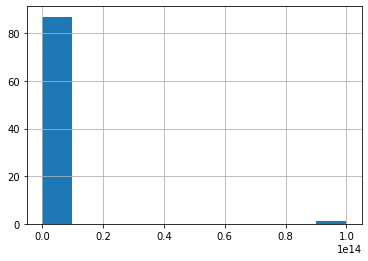

In [242]:
df_imdb.gross.hist()

In [243]:
df_imdb.loc[(df_imdb.gross > 1e9) | (df_imdb.gross < 0), "gross"] = np.nan

In [244]:
df_imdb.gross.describe()

count          85.00
mean    146375408.78
std     133101672.08
min         41229.00
25%      47034272.00
50%     107100855.00
75%     228430993.00
max     623279547.00
Name: gross, dtype: float64

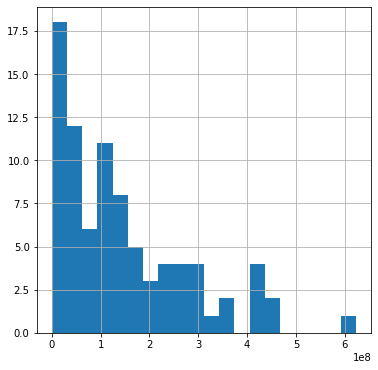

In [245]:
df_imdb.gross.hist(figsize=(6, 6), bins=20)

In [246]:
df_imdb.loc[df_imdb.gross.isnull(), "gross"] = df_imdb.gross.mean()

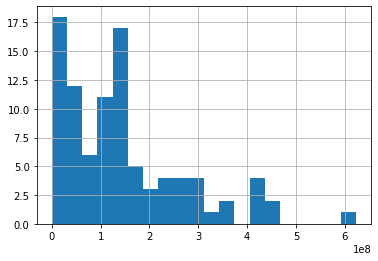

In [247]:
df_imdb.gross.hist(bins=20)

### Columna `genres`


In [248]:
df_imdb.genres

0             Biography|Comedy|Crime|Drama
1                  Action|Adventure|Sci-Fi
2     Crime|Drama|Mystery|Thriller|Western
3                                    Drama
4                        Adventure|Fantasy
                      ...                 
94                 Biography|Drama|History
95                            Comedy|Drama
96                Biography|Drama|Thriller
97                        Action|Drama|War
98           Biography|Drama|Music|Musical
Name: genres, Length: 94, dtype: object

In [249]:
df_imdb.genres.str.split("|").explode("genres")

0      Biography
1         Comedy
2          Crime
3          Drama
4         Action
         ...    
273          War
274    Biography
275        Drama
276        Music
277      Musical
Name: genres, Length: 278, dtype: object

In [250]:
df_imdb.genres.str.split("|").str.len().max()

5.0

In [251]:
df_imdb.genres.str.count("\\|").max() + 1

5.0

In [252]:
generos_cols = df_imdb.genres.str.split("|", n=5, expand=True)

In [253]:
df_imdb["genero_1"] = generos_cols[0]
df_imdb["genero_2"] = generos_cols[1]
df_imdb["genero_3"] = generos_cols[2]
df_imdb["genero_4"] = generos_cols[3]
df_imdb["genero_5"] = generos_cols[4]

In [254]:
df_imdb = df_imdb.drop("genres", axis=1)

In [255]:
df_imdb.columns

Index(['color', 'director_name', 'duration', 'gross', 'movie_title',
       'title_year', 'language', 'country', 'budget', 'imdb_score', 'actors',
       'movie_facebook_likes', 'movie_twitter_likes', 'genero_1', 'genero_2',
       'genero_3', 'genero_4', 'genero_5'],
      dtype='object')

### Columna `budget`

In [256]:
df_imdb.budget

0     USD 100,000,000.00
1     USD 200,000,000.00
2      USD 44,000,000.00
3      USD 14,000,000.00
4     USD 225,000,000.00
             ...        
94     USD 20,000,000.00
95               USD nan
96     USD 55,000,000.00
97     USD 68,000,000.00
98     USD 40,000,000.00
Name: budget, Length: 94, dtype: object

In [257]:
df_imdb["budget"] = (
    df_imdb.budget
    .str.replace("USD ", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)

In [258]:
df_imdb[df_imdb.budget.str.len() < 7]

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes,genero_1,genero_2,genero_3,genero_4,genero_5
7,Color,Edward Hall,180,146375408.78,restless,2012,English,UK,nan,7.20,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434,1000,Drama,Romance,None,None,None
27,Color,Gnana Rajasekaran,153,146375408.78,ramanujan,2014,English,India,nan,7.00,"Mani Bharathi,Michael Lieber,Kevin McGowan",58,1000,Biography,Drama,History,None,None
33,Color,Mike Leigh,150,3958500.00,mr. turner,2014,English,UK,nan,6.80,"Lesley Manville,Ruth Sheen,Karl Johnson",0,1000,Biography,Drama,History,None,None
95,Color,Richard J. Lewis,134,7501404.00,barney's version,2010,English,Canada,nan,7.30,"Mark Addy,Atom Egoyan,Paul Gross",0,1000,Comedy,Drama,None,None,None


In [259]:
df_imdb.budget.value_counts()

250000000.00    6
100000000.00    5
50000000.00     5
200000000.00    5
40000000.00     5
nan             4
25000000.00     4
61000000.00     3
65000000.00     3
125000000.00    2
35000000.00     2
32000000.00     2
160000000.00    2
20000000.00     2
225000000.00    2
30000000.00     1
17350.00        1
78000000.00     1
14000000.00     1
45000000.00     1
60000000.00     1
190000000.00    1
15000000.00     1
85000000.00     1
31000000.00     1
178000000.00    1
44000000.00     1
80000000.00     1
120000000.00    1
170000000.00    1
75000000.00     1
70000000.00     1
1400000.00      1
55000000.00     1
105000000.00    1
4000000.00      1
210000000.00    1
22000000.00     1
28000000.00     1
165000000.00    1
135000000.00    1
195000000.00    1
46000000.00     1
230000000.00    1
108000000.00    1
140000000.00    1
215000000.00    1
25500000.00     1
3500000.00      1
90000000.00     1
102000000.00    1
245000000.00    1
220000000.00    1
130000000.00    1
66000000.00     1
180000000.

In [260]:
df_imdb.loc[df_imdb.budget.str.len() < 5, "budget"] = np.nan

In [261]:
df_imdb["budget"] = pd.to_numeric(df_imdb.budget)

In [262]:
df_imdb.budget.describe()

count          90.00
mean    102182415.00
std      77428642.48
min         17350.00
25%      40000000.00
50%      72500000.00
75%     168750000.00
max     250000000.00
Name: budget, dtype: float64

In [263]:
df_imdb.loc[df_imdb.budget.isnull(), "budget"] = df_imdb.budget.mean()

In [264]:
df_imdb[["gross", "budget"]]

,gross,budget
0,116866727.00,100000000.00
1,408992272.00,200000000.00
2,54116191.00,44000000.00
3,46495.00,14000000.00
4,258355354.00,225000000.00
...,...,...
94,56667870.00,20000000.00
95,7501404.00,102182415.00
96,107100855.00,55000000.00
97,85707116.00,68000000.00


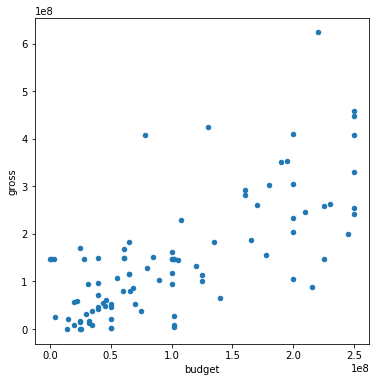

In [265]:
df_imdb[["gross", "budget"]].plot.scatter(x="budget", y="gross", figsize=(6, 6))

In [266]:
df_imdb[["gross", "budget"]].corr()

,gross,budget
gross,1.00,0.72
budget,0.72,1.00


### Columna `duration`

In [267]:
df_imdb.duration.value_counts(dropna=False)

 141    6
 137    6
 138    6
 136    5
 143    5
 134    4
 148    4
 146    4
 139    4
 144    4
 140    4
 142    3
 153    3
 158    3
 150    3
 165    2
 149    2
 164    2
 156    2
 135    2
 186    2
 147    1
 240    1
 650    1
 151    1
 195    1
 154    1
 157    1
 580    1
 167    1
 169    1
 170    1
 172    1
 173    1
 180    1
-50     1
 183    1
 187    1
 5      1
Name: duration, dtype: int64

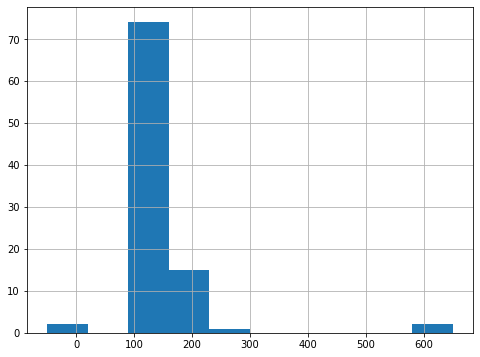

In [268]:
df_imdb.duration.hist(figsize=(8, 6))

In [269]:
df_imdb.duration.describe()

count    94.00
mean    155.79
std      74.67
min     -50.00
25%     138.00
50%     143.50
75%     155.50
max     650.00
Name: duration, dtype: float64

In [270]:
filtro_duration = (df_imdb.duration < 50) | (df_imdb.duration > 400)
df_imdb.loc[filtro_duration, "duration"] = np.nan

In [271]:
df_imdb.loc[df_imdb.duration.isna(), "duration"] = df_imdb.duration.median()

In [272]:
df_imdb["gross_budget_ratio"] = df_imdb.gross / df_imdb.budget

In [273]:
def identify_films(gross, rating):
    if gross > 150_000_000 and rating < 6.5:
        return "High gross, low rating"
    if gross < 80_000_000 and rating > 8:
        return "Low gross, high rating"
    return "Normal"

In [274]:
identify_films(180_000_000, 4)

'High gross, low rating'

In [275]:
df_imdb["type_film"] = df_imdb.apply(lambda row: identify_films(row["gross"], row["imdb_score"]), axis=1)

In [276]:
df_imdb.type_film.value_counts()

Normal                    89
Low gross, high rating     3
High gross, low rating     2
Name: type_film, dtype: int64

## Guardar dataset

In [277]:
df_imdb.to_csv("data/imdb_final.csv", sep=";", index=False)

### Columna `movie_title`

Volvemos a cargar el dataset y revisamos los cambios que ya hemos hecho a nivel de formato de campo

In [278]:
df_imdb = pd.read_csv("data/imdb_final.csv", sep=";")

In [279]:
df_imdb.head(10)

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes,genero_1,genero_2,genero_3,genero_4,genero_5,gross_budget_ratio,type_film
0,Color,Martin Scorsese,240.00,116866727.00,the wolf of wall street,2013,English,USA,100000000.00,8.20,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,1000,Biography,Comedy,Crime,Drama,NaN,1.17,Normal
1,Color,Shane Black,195.00,408992272.00,iron man 3,2013,English,USA,200000000.00,7.20,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000,1000,Action,Adventure,Sci-Fi,NaN,NaN,2.04,Normal
2,Color,Quentin Tarantino,187.00,54116191.00,the hateful eight,2015,English,USA,44000000.00,7.90,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000,1000,Crime,Drama,Mystery,Thriller,Western,1.23,Normal
3,Color,Kenneth Lonergan,186.00,46495.00,margaret,2011,English,usa,14000000.00,6.50,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0,1000,Drama,NaN,NaN,NaN,NaN,0.00,Normal
4,Color,Peter Jackson,186.00,258355354.00,the hobbit: the desolation of smaug,2013,English,USA,225000000.00,7.90,"Aidan Turner,Adam Brown,James Nesbitt",83000,1000,Adventure,Fantasy,NaN,NaN,NaN,1.15,Normal
5,Color,No information available,183.00,330249062.00,batman v superman: dawn of justice,202,English,USA,250000000.00,6.90,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000,1000,Action,Adventure,Sci-Fi,NaN,NaN,1.32,Normal
6,Color,Peter Jackson,143.50,303001229.00,the hobbit: an unexpected journey,2012,English,USA,180000000.00,7.90,"Aidan Turner,Adam Brown,James Nesbitt",166000,1000,Adventure,Fantasy,NaN,NaN,NaN,1.68,Normal
7,Color,Edward Hall,180.00,146375408.78,restless,2012,English,UK,102182415.00,7.20,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434,1000,Drama,Romance,NaN,NaN,NaN,1.43,Normal
8,Color,Joss Whedon,173.00,623279547.00,the avengers,2012,English,USA,220000000.00,8.10,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000,1000,Action,Adventure,Sci-Fi,NaN,NaN,2.83,Normal
9,Color,Tom Tykwer,172.00,27098580.00,cloud atlas,2012,English,Germany,102000000.00,-7.50,"Tom Hanks,Jim Sturgess,Jim Broadbent",124000,1000,Drama,Sci-Fi,NaN,NaN,NaN,0.27,Normal


In [280]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 94 non-null     object 
 1   director_name         94 non-null     object 
 2   duration              94 non-null     float64
 3   gross                 94 non-null     float64
 4   movie_title           94 non-null     object 
 5   title_year            94 non-null     int64  
 6   language              94 non-null     object 
 7   country               94 non-null     object 
 8   budget                94 non-null     float64
 9   imdb_score            94 non-null     float64
 10  actors                94 non-null     object 
 11  movie_facebook_likes  94 non-null     int64  
 12  movie_twitter_likes   94 non-null     int64  
 13  genero_1              93 non-null     object 
 14  genero_2              87 non-null     object 
 15  genero_3              67 



```
# This is formatted as code
```

Echamos un vistazo al campo `movie_title` con los métodos `head()`, `value_counts()` y `describe()`

In [281]:
df_imdb.movie_title.head()

0                the wolf of wall street
1                             iron man 3
2                      the hateful eight
3                               margaret
4    the hobbit: the desolation of smaug
Name: movie_title, dtype: object

In [282]:
df_imdb.movie_title.value_counts(dropna=False)

unbroken                   2
les misérables             2
ben-hur                    2
the wolf of wall street    1
get on up                  1
                          ..
lincoln                    1
exodus: gods and kings     1
the martian                1
the amazing spider-man     1
jersey boys                1
Name: movie_title, Length: 91, dtype: int64

In [283]:
df_imdb.movie_title.describe()

count           94
unique          91
top       unbroken
freq             2
Name: movie_title, dtype: object

Vemos que hay 91 valores únicos y 3 que se repiten

In [284]:
df_imdb.loc[df_imdb.movie_title.str.strip().str.lower().isin(["null","nan"])]

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes,genero_1,genero_2,genero_3,genero_4,genero_5,gross_budget_ratio,type_film


También vemos que no hay valores NaN como np.nan ni tampoco como strings "nan" o "null", por lo que a priori el campo está bien informado

Vamos a hacer 2 cosas:


1.   Por una parte, vamos a eliminar los duplicados, ya que la clave del data frame debería ser el `movie_title` y además, como vamos a ver, en los 3 duplicados hay registros con errores.
2.   Por otra parte, vamos a capitalizar la primera letra de cada palabra de los títulos, que es un formato más cercano a como se suelen presentar estos datos



In [285]:
df_imdb.loc[df_imdb.duplicated(['movie_title'], keep=False)]

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes,genero_1,genero_2,genero_3,genero_4,genero_5,gross_budget_ratio,type_film
19,Color,Tom Hooper,158.00,148775460.00,les misérables,-1000,English,USA,61000000.00,7.60,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000,1000,Drama,Musical,Romance,NaN,NaN,2.44,Normal
20,Color,Tom Hooper,158.00,148775460.00,les misérables,2012,English,USA,61000000.00,7.60,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000,1000,Drama,Musical,Romance,NaN,NaN,2.44,Normal
57,Color,Timur Bekmambetov,141.00,146375408.78,ben-hur,2016,English,USA,100000000.00,6.10,"Morgan Freeman,Ayelet Zurer,Moises Arias",0,1000,Adventure,Drama,History,NaN,NaN,1.46,Normal
58,Color,Timur Bekmambetov,141.00,146375408.78,ben-hur,2016,English,USA,100000000.00,6.00,"Morgan Freeman,Ayelet Zurer,Moises Arias",0,1000,Adventure,Drama,History,NaN,NaN,1.46,Normal
80,Color,Angelina Jolie Pitt,137.00,115603980.00,unbroken,2014,English,USA,65000000.00,-1.20,"Finn Wittrock,Jack O'Connell,Alex Russell",35000,1000,Biography,Drama,Sport,War,NaN,1.78,Normal
81,Color,Angelina Jolie Pitt,137.00,115603980.00,unbroken,2014,English,USA,65000000.00,7.20,"Finn Wittrock,Jack O'Connell,Alex Russell",35000,1000,Biography,Drama,Sport,War,NaN,1.78,Normal


Eliminamos:
- El registro de *les misérables* con año -1000, claramente erróneo.
- El registro de *unbroken* con -1.20 en el `imdb_score` (el score no puede ser negativo)
- El registro de *ben-hur* duplicado. En este caso, como ambos parecen estar bien, y la única diferencia es una décima en el `imdb_score`, vamos a dejar un promedio en ese campo

In [286]:
dropped_records = df_imdb.loc[(df_imdb["movie_title"] == "les misérables") & (df_imdb["title_year"] == -1000)   |
                              (df_imdb["movie_title"] == "unbroken") & (df_imdb["imdb_score"] < 0)              |
                              (df_imdb["movie_title"] == "ben-hur") & (df_imdb["imdb_score"] == 6.00)]
dropped_records

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes,genero_1,genero_2,genero_3,genero_4,genero_5,gross_budget_ratio,type_film
19,Color,Tom Hooper,158.00,148775460.00,les misérables,-1000,English,USA,61000000.00,7.60,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000,1000,Drama,Musical,Romance,NaN,NaN,2.44,Normal
58,Color,Timur Bekmambetov,141.00,146375408.78,ben-hur,2016,English,USA,100000000.00,6.00,"Morgan Freeman,Ayelet Zurer,Moises Arias",0,1000,Adventure,Drama,History,NaN,NaN,1.46,Normal
80,Color,Angelina Jolie Pitt,137.00,115603980.00,unbroken,2014,English,USA,65000000.00,-1.20,"Finn Wittrock,Jack O'Connell,Alex Russell",35000,1000,Biography,Drama,Sport,War,NaN,1.78,Normal


In [287]:
df_imdb.drop(dropped_records.index, axis=0, inplace=True)


In [288]:
df_imdb.loc[df_imdb["movie_title"] == "ben-hur", "imdb_score"] = 6.05

In [289]:
df_imdb.movie_title.describe()

count                          91
unique                         91
top       the wolf of wall street
freq                            1
Name: movie_title, dtype: object

In [290]:
df_imdb[df_imdb["movie_title"].isin(["ben-hur","les misérables", "unbroken"])]

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes,genero_1,genero_2,genero_3,genero_4,genero_5,gross_budget_ratio,type_film
20,Color,Tom Hooper,158.00,148775460.00,les misérables,2012,English,USA,61000000.00,7.60,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000,1000,Drama,Musical,Romance,NaN,NaN,2.44,Normal
57,Color,Timur Bekmambetov,141.00,146375408.78,ben-hur,2016,English,USA,100000000.00,6.05,"Morgan Freeman,Ayelet Zurer,Moises Arias",0,1000,Adventure,Drama,History,NaN,NaN,1.46,Normal
81,Color,Angelina Jolie Pitt,137.00,115603980.00,unbroken,2014,English,USA,65000000.00,7.20,"Finn Wittrock,Jack O'Connell,Alex Russell",35000,1000,Biography,Drama,Sport,War,NaN,1.78,Normal


In [291]:
df_imdb["movie_title"] = df_imdb.movie_title.str.title()

In [292]:
df_imdb.movie_title.head()

0                The Wolf Of Wall Street
1                             Iron Man 3
2                      The Hateful Eight
3                               Margaret
4    The Hobbit: The Desolation Of Smaug
Name: movie_title, dtype: object

### Columna `title_year`

Exploramos la columna con `head()`, `value_counts()` y `describe()`

In [293]:
df_imdb.title_year.head()

0    2013
1    2013
2    2015
3    2011
4    2013
Name: title_year, dtype: int64

In [294]:
df_imdb.title_year.value_counts(dropna=False)

2014    21
2012    19
2013    17
2011    10
2015     8
2010     7
2016     5
202      1
2030     1
1800     1
205      1
Name: title_year, dtype: int64

In [295]:
df_imdb.title_year.describe()

count     91.00
mean    1970.99
std      267.37
min      202.00
25%     2012.00
50%     2013.00
75%     2014.00
max     2030.00
Name: title_year, dtype: float64

Vemos que el formato está OK, ya que es un entero.
También vemos que no hay valores NaN o null

Pero hay algunos valores claramente erróneos: los menores de 1900 (por usar una cota) y los posteriores al año actual, 2022.
Vamos a extraerlos.

In [296]:
filter_wrong_title_year = (df_imdb["title_year"] < 1900) | (df_imdb["title_year"] > 2022)

df_imdb.loc[filter_wrong_title_year, ["movie_title","title_year"]]

,movie_title,title_year
5,Batman V Superman: Dawn Of Justice,202
56,Avengers: Age Of Ultron,2030
66,Divergent,1800
76,Child 44,205


Podríamos sustituir esos valores por la mediana del resto de valores, pero dado que la BB.DD. de IMDB es pública, vamos a optar por buscar el año correcto y sustituirlo directamente en el data frame

In [297]:
correction_wrong_title_year = {"Batman V Superman: Dawn Of Justice": 2016,
                               "Avengers: Age Of Ultron": 2015,
                               "Divergent": 2014,
                               "Child 44": 2015}

for x in correction_wrong_title_year.keys():                          
  df_imdb.loc[df_imdb["movie_title"] == x, "title_year"] = correction_wrong_title_year[x] 

In [298]:
df_imdb.title_year.describe()

count     91.00
mean    2013.00
std        1.63
min     2010.00
25%     2012.00
50%     2013.00
75%     2014.00
max     2016.00
Name: title_year, dtype: float64

Podemos añadir una gráfica para ver el número de películas hechas cada año, y su progresión

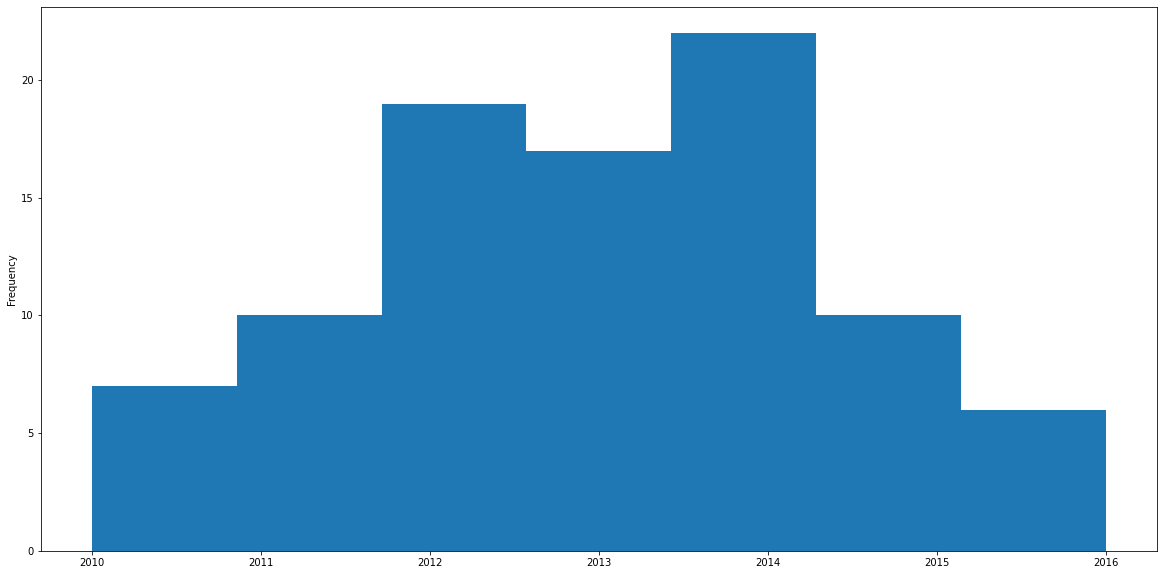

In [299]:
range = df_imdb.title_year.max() - df_imdb.title_year.min()
_ = df_imdb.title_year.plot(kind='hist',
                            bins=range+1,
                            figsize=(20,10))

### Columna `movie_twitter_likes`

Exploramos la columna con `head()`, `value_counts()` y `describe()`

In [300]:
df_imdb.movie_twitter_likes.head()

0    1000
1    1000
2    1000
3    1000
4    1000
Name: movie_twitter_likes, dtype: int64

In [301]:
df_imdb.movie_twitter_likes.value_counts(dropna=False)

1000    91
Name: movie_twitter_likes, dtype: int64

In [302]:
df_imdb.movie_twitter_likes.describe()

count     91.00
mean    1000.00
std        0.00
min     1000.00
25%     1000.00
50%     1000.00
75%     1000.00
max     1000.00
Name: movie_twitter_likes, dtype: float64

El campo es un entero y no tiene NaN, por lo que a nivel de formato está OK.
Sin embargo, el hecho de que todos los registros tengan el mismo n.º de likes en Twitter indica que probablemente este campo está mal informado

### Columna `imdb_score`

Exploramos la columna con `head()`, `value_counts()` y `describe()`

In [303]:
df_imdb.imdb_score.head()

0   8.20
1   7.20
2   7.90
3   6.50
4   7.90
Name: imdb_score, dtype: float64

In [304]:
pd.set_option('display.max_rows',16)

In [305]:
df_imdb.imdb_score.value_counts(dropna=False)

6.70     9
8.10     8
7.30     7
7.20     6
7.90     5
        ..
8.40     1
-7.50    1
5.60     1
8.60     1
8.70     1
Name: imdb_score, Length: 34, dtype: int64

In [306]:
df_imdb.imdb_score.describe()

count   91.00
mean     6.97
std      1.80
min     -7.50
25%      6.65
50%      7.20
75%      7.90
max      8.80
Name: imdb_score, dtype: float64

Vemos que es ya una variable de tipo `float`.

Comprobamos también que no tiene valores NaN

In [307]:
df_imdb.imdb_score.isna().any()

False

Vemos, sin embargo, un valor mínimo negativo, lo cual no es posible ya que la puntuación no puede ser menor que 0.

Vamos a analizar las puntuaciones negativas o iguales a 0

In [308]:
df_imdb[df_imdb["imdb_score"] <= 0]

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes,genero_1,genero_2,genero_3,genero_4,genero_5,gross_budget_ratio,type_film
9,Color,Tom Tykwer,172.00,27098580.00,Cloud Atlas,2012,English,Germany,102000000.00,-7.50,"Tom Hanks,Jim Sturgess,Jim Broadbent",124000,1000,Drama,Sci-Fi,NaN,NaN,NaN,0.27,Normal


Al igual que hicimos con la columna `title_year`, podemos irnos a la base de datos de IMDB y buscar el score de la película *Cloud Atlas*. 
Sin embargo, desconocemos la fecha en la que se tomó el dataset con el que trabajamos, por lo que puede que el score no se corresponda con el que hay ahora.

Por ello, vamos a optar por una solución más conservadora, que es sustituir el `imdb_score` negativo por la mediana del resto de datos

In [309]:
df_imdb.loc[df_imdb["imdb_score"] <= 0, "imdb_score"] = df_imdb.loc[df_imdb["imdb_score"] > 0, "imdb_score"].median()

In [310]:
df_imdb.imdb_score.describe()

count   91.00
mean     7.13
std      0.95
min      3.00
25%      6.70
50%      7.20
75%      7.90
max      8.80
Name: imdb_score, dtype: float64

Podemos por último representar en un histograma el número de películas que ha recibido cada puntuación

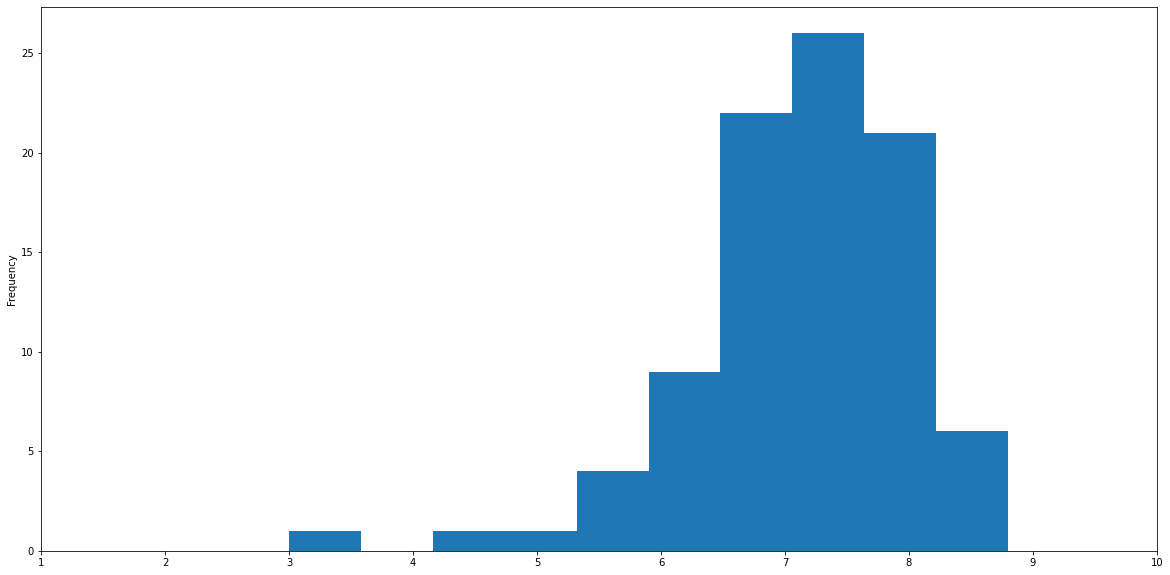

In [311]:
_ = df_imdb.imdb_score.plot(kind='hist', bins=10, xticks=np.arange(1,11), figsize=(20,10))

### Columna `country`

Exploramos la columna con `head()`, `value_counts()` y `describe()`

In [312]:
df_imdb.country.head(10)

0        USA
1        USA
2        USA
3        usa
4        USA
5        USA
6        USA
7         UK
8        USA
9    Germany
Name: country, dtype: object

In [313]:
df_imdb.country.value_counts(dropna=False)

USA               72
UK                 6
usa                3
France             2
Germany            1
New Zealand        1
India              1
United States      1
Australia          1
Czech Republic     1
Kyrgyzstan         1
Canada             1
Name: country, dtype: int64

In [314]:
df_imdb.country.describe()

count      91
unique     12
top       USA
freq       72
Name: country, dtype: object

In [315]:
df_imdb.country.isna().any()

False

Vemos que no hay valores NaN (tampoco como string), pero EE.UU. aparece escrito hasta de 3 formas distintas, por lo que lo vamos a formatear para que aparezca siempre como "USA"

In [316]:
filter_usa = df_imdb.country.str.lower().isin(['usa','united states'])
df_imdb.loc[filter_usa, "country"] = "USA"

In [317]:
df_imdb.country.value_counts(ascending=False)

USA               76
UK                 6
France             2
Germany            1
New Zealand        1
India              1
Australia          1
Czech Republic     1
Kyrgyzstan         1
Canada             1
Name: country, dtype: int64

### Columna `language`

Exploramos la columna con `head()`, `value_counts()` y `describe()`

In [318]:
df_imdb.language.head()

0    English
1    English
2    English
3    English
4    English
Name: language, dtype: object

In [319]:
df_imdb.language.value_counts(dropna=False)

English    91
Name: language, dtype: int64

In [320]:
df_imdb.language.describe()

count          91
unique          1
top       English
freq           91
Name: language, dtype: object

Este campo no requiere tratamiento: los 91 registros de la tabla lo tienen informado a *English*

### Columna `movie_facebook_likes`

Exploramos la columna con `head()`, `value_counts()` y `describe()`

In [321]:
df_imdb.movie_facebook_likes.head()

0    138000
1     95000
2    114000
3         0
4     83000
Name: movie_facebook_likes, dtype: int64

In [322]:
df_imdb.movie_facebook_likes.value_counts(dropna=False)

0         7
82000     3
24000     2
47000     2
39000     2
         ..
146000    1
5000      1
95000     1
85000     1
31000     1
Name: movie_facebook_likes, Length: 67, dtype: int64

In [323]:
df_imdb.movie_facebook_likes.isnull().any()

False

In [324]:
df_imdb.movie_facebook_likes.describe()

count       91.00
mean     65829.95
std      58602.26
min          0.00
25%      25000.00
50%      54000.00
75%      84000.00
max     349000.00
Name: movie_facebook_likes, dtype: float64

Todos los registros tienen un valor numérico (entero), y no hay valores NaN, por lo que este campo tiene valores válidos.
Hay algunos casos con 0 likes, pero entran en lo razonable

### Columna `actors`

Exploramos la columna con `head()`, `value_counts()` y `describe()`

In [325]:
df_imdb.actors.head()

0    Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1            Robert Downey Jr.,Jon Favreau,Don Cheadle
2            Craig Stark,Jennifer Jason Leigh,Zoë Bell
3          Matt Damon,Kieran Culkin,John Gallagher Jr.
4                Aidan Turner,Adam Brown,James Nesbitt
Name: actors, dtype: object

In [326]:
df_imdb.actors.value_counts(dropna=False)

Aidan Turner,Adam Brown,James Nesbitt                   3
Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson    2
Leonardo DiCaprio,Matthew McConaughey,Jon Favreau       1
Robert Downey Jr.,Robert Duvall,Leighton Meester        1
Brad Pitt,Tye Sheridan,Fiona Shaw                       1
                                                       ..
Johnny Depp,Ruth Wilson,Tom Wilkinson                   1
Lesley Manville,Ruth Sheen,Karl Johnson                 1
Joseph Gordon-Levitt,Hal Holbrook,Bruce McGill          1
Christian Bale,María Valverde,Ben Mendelsohn            1
Johnny Cannizzaro,Steve Schirripa,Scott Vance           1
Name: actors, Length: 88, dtype: int64

In [327]:
df_imdb.actors.isna().any()

False

In [328]:
df_imdb.loc[df_imdb.actors.str.lower().str.split().isin(["nan","null",""])]

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,movie_twitter_likes,genero_1,genero_2,genero_3,genero_4,genero_5,gross_budget_ratio,type_film


No hay registros vacíos ni a NaN, tampoco como string

Vamos a optar por la misma solución que en la columna `genres`, separar en varias columnas con un `split`

In [329]:
unique_actors = df_imdb.actors.str.split(",").explode("actors").sort_values().unique()
print(unique_actors)

['Adam Brown' 'Aidan Turner' 'Alan D. Purwin' 'Alana Kaniewski'
 'Albert Finney' 'Aldis Hodge' 'Alex Russell' 'Amber Rose Revah'
 'Amy Ryan' 'Andrew Garfield' 'Angelo Anthony Pizza' 'Anne Hathaway'
 'Anthony Hopkins' 'Anthony Reynolds' 'Ato Essandoh' 'Atom Egoyan'
 'Aunjanue Ellis' 'Austin Pendleton' 'Ayelet Zurer' 'Aziz Muradillayev'
 'B.J. Novak' 'Ben Mendelsohn' 'Benedict Cumberbatch' 'Benedict Wong'
 'Billy Crudup' 'Bingbing Li' 'Brad Pitt' 'Bradley Cooper'
 'Brandon Landers' 'Bruce Goodchild' 'Bruce Greenwood' 'Bruce McGill'
 'Bryce Dallas Howard' 'Celina Beach' 'Charlize Theron'
 'Charlotte Rampling' 'Chris Evans' 'Chris Hemsworth' 'Chris Mulkey'
 'Chris Noth' 'Chris Zylka' 'Christian Bale' 'Christoph Waltz'
 'Christopher Meloni' 'Craig Stark' 'Darwin Shaw' 'David Costabile'
 'Demián Bichir' 'Denzel Washington' 'Don Cheadle' 'Donald Glover'
 'Donald Watkins' 'Dylan Minnette' 'Eddie Marsan' 'Eddie Redmayne'
 'Elina Abai Kyzy' 'Elizabeth Debicki' 'Ellar Coltrane'
 'Emily Ratajkowsk

In [330]:
df_imdb.actors.str.split(",",expand=True)

,0,1,2
0,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Aidan Turner,Adam Brown,James Nesbitt
...,...,...,...
89,Quvenzhané Wallis,Scoot McNairy,Taran Killam
90,Mark Addy,Atom Egoyan,Paul Gross
91,Tom Hanks,Chris Mulkey,Michael Chernus
92,Brad Pitt,Logan Lerman,Jim Parrack


Como máximo hay 3 actores por cada película (y de hecho, como mínimo también)

In [331]:
print(df_imdb.actors.str.split(',').str.len().min())
print(df_imdb.actors.str.split(',').str.len().max())

3
3


Creamos 3 campos nuevos de actor: `actor_1`, `actor_2` y `actor_3`, y borramos `actor`

In [332]:
actor_cols = df_imdb.actors.str.split(",", n=3, expand=True)

df_imdb["actor_1"] = actor_cols[0]
df_imdb["actor_2"] = actor_cols[1]
df_imdb["actor_3"] = actor_cols[2]

In [333]:
df_imdb[["movie_title","actors","actor_1","actor_2","actor_3"]]

,movie_title,actors,actor_1,actor_2,actor_3
0,The Wolf Of Wall Street,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Iron Man 3,"Robert Downey Jr.,Jon Favreau,Don Cheadle",Robert Downey Jr.,Jon Favreau,Don Cheadle
2,The Hateful Eight,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Margaret,"Matt Damon,Kieran Culkin,John Gallagher Jr.",Matt Damon,Kieran Culkin,John Gallagher Jr.
4,The Hobbit: The Desolation Of Smaug,"Aidan Turner,Adam Brown,James Nesbitt",Aidan Turner,Adam Brown,James Nesbitt
...,...,...,...,...,...
89,12 Years A Slave,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",Quvenzhané Wallis,Scoot McNairy,Taran Killam
90,Barney'S Version,"Mark Addy,Atom Egoyan,Paul Gross",Mark Addy,Atom Egoyan,Paul Gross
91,Captain Phillips,"Tom Hanks,Chris Mulkey,Michael Chernus",Tom Hanks,Chris Mulkey,Michael Chernus
92,Fury,"Brad Pitt,Logan Lerman,Jim Parrack",Brad Pitt,Logan Lerman,Jim Parrack


In [334]:
df_imdb.drop("actors", axis=1, inplace=True)

In [335]:
df_imdb.head()

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,...,genero_1,genero_2,genero_3,genero_4,genero_5,gross_budget_ratio,type_film,actor_1,actor_2,actor_3
0,Color,Martin Scorsese,240.00,116866727.00,The Wolf Of Wall Street,2013,English,USA,100000000.00,8.20,...,Biography,Comedy,Crime,Drama,NaN,1.17,Normal,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Color,Shane Black,195.00,408992272.00,Iron Man 3,2013,English,USA,200000000.00,7.20,...,Action,Adventure,Sci-Fi,NaN,NaN,2.04,Normal,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,Color,Quentin Tarantino,187.00,54116191.00,The Hateful Eight,2015,English,USA,44000000.00,7.90,...,Crime,Drama,Mystery,Thriller,Western,1.23,Normal,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Color,Kenneth Lonergan,186.00,46495.00,Margaret,2011,English,USA,14000000.00,6.50,...,Drama,NaN,NaN,NaN,NaN,0.00,Normal,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Color,Peter Jackson,186.00,258355354.00,The Hobbit: The Desolation Of Smaug,2013,English,USA,225000000.00,7.90,...,Adventure,Fantasy,NaN,NaN,NaN,1.15,Normal,Aidan Turner,Adam Brown,James Nesbitt


Lo exportamos a csv

In [336]:
df_imdb.to_csv("data/imdb_final_miguel_fernandez_angulo.csv", sep=";", index=False)

## Cifras para el stakeholder

1. Actores más repetidos en el dataset

Aunque habría sido más cómodo a partir del dataset original, vamos a utilizar el que hemos generado

In [337]:
df_imdb = pd.read_csv("data/imdb_final_miguel_fernandez_angulo.csv", sep=";")
df_imdb.head(10)

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,...,genero_1,genero_2,genero_3,genero_4,genero_5,gross_budget_ratio,type_film,actor_1,actor_2,actor_3
0,Color,Martin Scorsese,240.00,116866727.00,The Wolf Of Wall Street,2013,English,USA,100000000.00,8.20,...,Biography,Comedy,Crime,Drama,NaN,1.17,Normal,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau
1,Color,Shane Black,195.00,408992272.00,Iron Man 3,2013,English,USA,200000000.00,7.20,...,Action,Adventure,Sci-Fi,NaN,NaN,2.04,Normal,Robert Downey Jr.,Jon Favreau,Don Cheadle
2,Color,Quentin Tarantino,187.00,54116191.00,The Hateful Eight,2015,English,USA,44000000.00,7.90,...,Crime,Drama,Mystery,Thriller,Western,1.23,Normal,Craig Stark,Jennifer Jason Leigh,Zoë Bell
3,Color,Kenneth Lonergan,186.00,46495.00,Margaret,2011,English,USA,14000000.00,6.50,...,Drama,NaN,NaN,NaN,NaN,0.00,Normal,Matt Damon,Kieran Culkin,John Gallagher Jr.
4,Color,Peter Jackson,186.00,258355354.00,The Hobbit: The Desolation Of Smaug,2013,English,USA,225000000.00,7.90,...,Adventure,Fantasy,NaN,NaN,NaN,1.15,Normal,Aidan Turner,Adam Brown,James Nesbitt
5,Color,No information available,183.00,330249062.00,Batman V Superman: Dawn Of Justice,2016,English,USA,250000000.00,6.90,...,Action,Adventure,Sci-Fi,NaN,NaN,1.32,Normal,Henry Cavill,Lauren Cohan,Alan D. Purwin
6,Color,Peter Jackson,143.50,303001229.00,The Hobbit: An Unexpected Journey,2012,English,USA,180000000.00,7.90,...,Adventure,Fantasy,NaN,NaN,NaN,1.68,Normal,Aidan Turner,Adam Brown,James Nesbitt
7,Color,Edward Hall,180.00,146375408.78,Restless,2012,English,UK,102182415.00,7.20,...,Drama,Romance,NaN,NaN,NaN,1.43,Normal,Rufus Sewell,Hayley Atwell,Charlotte Rampling
8,Color,Joss Whedon,173.00,623279547.00,The Avengers,2012,English,USA,220000000.00,8.10,...,Action,Adventure,Sci-Fi,NaN,NaN,2.83,Normal,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson
9,Color,Tom Tykwer,172.00,27098580.00,Cloud Atlas,2012,English,Germany,102000000.00,7.20,...,Drama,Sci-Fi,NaN,NaN,NaN,0.27,Normal,Tom Hanks,Jim Sturgess,Jim Broadbent


In [338]:
# Opción 1
pd.DataFrame(list(df_imdb["actor_1"]) + list(df_imdb["actor_2"]) + list(df_imdb["actor_3"])).value_counts(ascending=False)

Leonardo DiCaprio     7
Jennifer Lawrence     6
Robert Downey Jr.     5
Tom Hardy             5
Scarlett Johansson    4
                     ..
Helen McCrory         1
Jack O'Connell        1
Jake Gyllenhaal       1
James Badge Dale      1
Zoë Bell              1
Length: 209, dtype: int64

In [339]:
# Opción 2 (más limpia)
actores_repeticiones = df_imdb["actor_1"].append(df_imdb["actor_2"]).append(df_imdb["actor_3"]).value_counts(ascending=False)

In [340]:
actor_mas_repetido = actores_repeticiones.index[0]
print("El actor más repetido es " + actor_mas_repetido + " <3")

El actor más repetido es Leonardo DiCaprio <3


O si queremos los que aparecen más de una vez:

In [341]:
actores_varias_peliculas = actores_repeticiones.loc[actores_repeticiones > 1].index

print("Actores que aparecen en más de una película:\n")

for x in actores_varias_peliculas:
  print(x)

Actores que aparecen en más de una película:

Leonardo DiCaprio
Jennifer Lawrence
Tom Hardy
Robert Downey Jr.
Scarlett Johansson
Hugh Jackman
Aidan Turner
Josh Hutcherson
Joseph Gordon-Levitt
Tom Hanks
Christian Bale
Emma Stone
Matthew McConaughey
Brad Pitt
Adam Brown
James Nesbitt
Christoph Waltz
Logan Lerman
Goran Visnjic
Rory Kinnear
Hayley Atwell
Billy Crudup
Andrew Garfield
Kevin Dunn
Jon Favreau
Michael Fassbender
Anne Hathaway
Chris Hemsworth
Mark Addy
Johnny Depp
Chris Evans
Matt Damon
Henry Cavill
Ben Mendelsohn
Tye Sheridan


2. Géneros de películas más comunes

Procedemos igual que con los actores

In [342]:
generos_repeticiones = (
    df_imdb["genero_1"]
    .append(df_imdb["genero_2"])
    .append(df_imdb["genero_3"])
    .append(df_imdb["genero_4"])
    .append(df_imdb["genero_5"])
    .value_counts(ascending=False)
)

generos_repeticiones

Drama        58
Adventure    35
Action       30
Thriller     28
Sci-Fi       22
             ..
Musical       3
Music         3
Sport         2
Animation     1
Horror        1
Length: 19, dtype: int64

Vamos a quedarnos con los géneros por encima del tercer cuartil, por ejemplo

In [343]:
import numpy as np

generos_mas_repetidos = generos_repeticiones [ generos_repeticiones > np.percentile(generos_repeticiones,75) ]

print("Los géneros más repetidos son: ")
print(generos_mas_repetidos)

Los géneros más repetidos son: 
Drama        58
Adventure    35
Action       30
Thriller     28
Sci-Fi       22
dtype: int64
